In [1]:
import numpy
import ler


In [3]:
from ler.utils import load_json
unlensed_param = load_json('/home/dices/SURE/lensing/ler_data/unlensed_param.json')
lensed_param = load_json('/home/dices/SURE/lensing/ler_data/lensed_param.json')

numpy.random.seed(1234)
n= numpy.random.randint(100000)
print(n)
test = {}
lensed_param_keys = list(lensed_param.keys())
lensed_param_values = list(lensed_param.values())
print (unlensed_param.keys())
print (lensed_param.keys())
for i in range(len(lensed_param_keys)):
    if lensed_param_keys[i] != 'zl':
        test[lensed_param_keys[i]] = lensed_param_values[i][n]
print (test)




92975
dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'L1', 'H1', 'V1', 'optimal_snr_net'])
dict_keys(['zl', 'zs', 'sigma', 'q', 'theta_E', 'phi', 'e1', 'e2', 'gamma1', 'gamma2', 'gamma', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'effective_luminosity_distance', 'effective_geocent_time', 'optimal_snr_net', 'L1', 'H1', 'V1'])
{'zs': 4.358533682348486, 'sigma': 171.16534785990333, 'q': 0.4443675429888806, 'theta_E': 2.13641427658487e-06, 'phi': 2.4891464553677634, 'e1': 0.10108919437382796, 'e2': -0.37116934420500214, 'gamma1': 0.02325053112004708, 'gamma2': 0.07263241719963578, 'gamma': 1.92598863584538, 'ra': 1.2983023612281916, 'dec': 0.16109437877095636, 'phase': 5.435044884446668, 'psi': 1.638876015956233, 'theta_jn': 1.45781893

In [50]:
import bilby
import numpy as np
import matplotlib.pyplot as plt
from golum.tools import waveformmodels, utils 
sampling_frequency = 2048.
duration = 4.
event1_parameters = {'mass_1': 36.0, 'mass_2': 29.0, 'a_1': 0.4, 
                     'a_2': 0.3, 'tilt_1': 0.5, 'tilt_2': 1.0, 
                     'phi_12': 1.7, 'phi_jl': 0.3, 
                     'luminosity_distance': 1500.0, 
                     'theta_jn': 0.4, 'psi': 2.659, 'phase': 1.3,
                     'ra': 1.375, 'dec': -1.2108, 
                     'geocent_time': 1126259642.413, 'n_phase' : 0.5}
lensing_parameters = dict(relative_magnification = 3., delta_t = 0.001*3600, 
                         delta_n = 1.)

lensing_parameters1 = dict(relative_magnification = 0.5, delta_t = 0.002*3600, 
                         delta_n = 1.)
lensing_parameters2 = dict(relative_magnification = 1.5, delta_t = 0.0017*3600,
                            delta_n = 0.)

01:35 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: golum.tools.waveformmodels.lensed_bbh_model
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
01:35 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: golum.tools.waveformmodels.lensed_bbh_model
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
01:35 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
01:35 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: golum.tools.waveformmodels.lensed_bbh_model
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_p

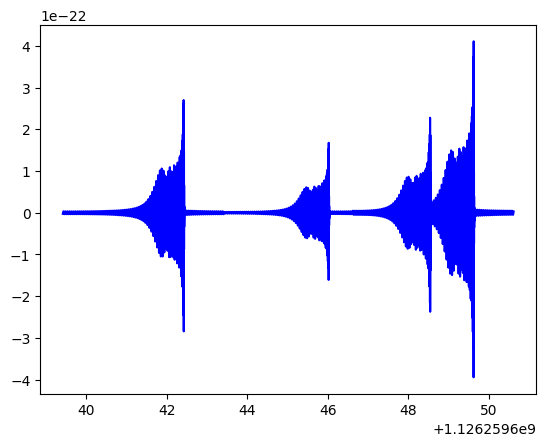

In [73]:
from bilby.gw.detector import networks
injection_parameters = utils.make_bbh_parameters_from_first_image_parameters_and_lensing_parameters(event1_parameters,
                                                                                                    lensing_parameters)
injection_parameters1 = utils.make_bbh_parameters_from_first_image_parameters_and_lensing_parameters(event1_parameters,
                                                                                                    lensing_parameters1)
injection_parameters2 = utils.make_bbh_parameters_from_first_image_parameters_and_lensing_parameters(event1_parameters,
                                                                                                    lensing_parameters2)
original_parameters = event1_parameters
waveform_arguments = dict(waveform_approximant = 'IMRPhenomPv2',
                          reference_frequency = 50.,
                          minimum_frequency = 20.) 
# WF for injection 
injection_wf_gen = bilby.gw.WaveformGenerator(duration = duration,
                                              sampling_frequency = sampling_frequency,
                                              frequency_domain_source_model = waveformmodels.lensed_bbh_model, 
                                              waveform_arguments = waveform_arguments)
injection1_wf_gen = bilby.gw.WaveformGenerator(duration = duration,
                                                sampling_frequency = sampling_frequency,
                                                frequency_domain_source_model = waveformmodels.lensed_bbh_model,
                                                waveform_arguments = waveform_arguments)
original_wf_gen = bilby.gw.WaveformGenerator(duration = duration,
                                                sampling_frequency = sampling_frequency,
                                                frequency_domain_source_model = bilby.gw.source.lal_binary_black_hole,
                                                parameters=original_parameters,
                                                waveform_arguments = waveform_arguments)
injection2_wf_gen = bilby.gw.WaveformGenerator(duration = duration,
                                                sampling_frequency = sampling_frequency,
                                                frequency_domain_source_model = waveformmodels.lensed_bbh_model,
                                                waveform_arguments = waveform_arguments)

# do the lensed injection in a zero noise ifo
ifo = networks.get_empty_interferometer("H1")
ifo1 = networks.get_empty_interferometer("H1")
ifo2 = networks.get_empty_interferometer("H1")
ifo3 = networks.get_empty_interferometer("H1")
ifo.set_strain_data_from_zero_noise(sampling_frequency = sampling_frequency, 
                                                   duration = duration, 
                                                   start_time = injection_parameters['geocent_time'] - 3.)
ifo.inject_signal(waveform_generator = injection_wf_gen,
                   parameters = injection_parameters)
ifo1.set_strain_data_from_zero_noise(sampling_frequency = sampling_frequency,
                                                    duration = duration,
                                                    start_time = original_parameters['geocent_time'] - 3.)
ifo1.inject_signal(waveform_generator = original_wf_gen,
                    parameters = original_parameters)
ifo2.set_strain_data_from_zero_noise(sampling_frequency = sampling_frequency,
                                                    duration = duration,
                                                    start_time = injection_parameters1['geocent_time'] - 3.)
ifo2.inject_signal(waveform_generator = injection1_wf_gen,
                    parameters = injection_parameters1)
ifo3.set_strain_data_from_zero_noise(sampling_frequency = sampling_frequency,
                                                    duration = duration,
                                                    start_time = injection_parameters2['geocent_time'] - 3.)
ifo3.inject_signal(waveform_generator = injection2_wf_gen,
                    parameters = injection_parameters2)
# plot the injection signal in time domain
plt.plot(ifo.strain_data.time_array, ifo.strain_data.time_domain_strain, color = 'b')
plt.plot(ifo1.strain_data.time_array, ifo1.strain_data.time_domain_strain, color = 'b')
plt.plot(ifo2.strain_data.time_array, ifo2.strain_data.time_domain_strain, color = 'b')
plt.plot(ifo3.strain_data.time_array, ifo3.strain_data.time_domain_strain, color = 'b')
combined_strain = (ifo.strain_data.time_domain_strain +
                   ifo1.strain_data.time_domain_strain +
                   ifo2.strain_data.time_domain_strain +
                   ifo3.strain_data.time_domain_strain)





00:29 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
00:29 bilby INFO    : Injected signal in H1:
00:29 bilby INFO    :   optimal SNR = 23.78
00:29 bilby INFO    :   matched filter SNR = 23.78+0.00j
00:29 bilby INFO    :   mass_1 = 36.0
00:29 bilby INFO    :   mass_2 = 29.0
00:29 bilby INFO    :   a_1 = 0.4
00:29 bilby INFO    :   a_2 = 0.3
00:29 bilby INFO    :   tilt_1 = 0.5
00:29 bilby INFO    :   tilt_2 = 1.0
00:29 bilby INFO    :   phi_12 = 1.7
00:29 bilby INFO    :   phi_jl = 0.3
00:29 bilby INFO    :   luminosity_distance = 1000.0
00:29 bilby INFO    :   theta_jn = 0.4
00:29 bilby INFO    :   phase = 1.3
00:29 bilby INFO    :   ra = 1.375
00:29 bilby INFO    :   dec = -1.2108
00:29 bilby INFO    :   geocent_time = 1126259642.413
00:29 bilby INFO    :   psi = 2.659
00:29 bilby INFO    : I

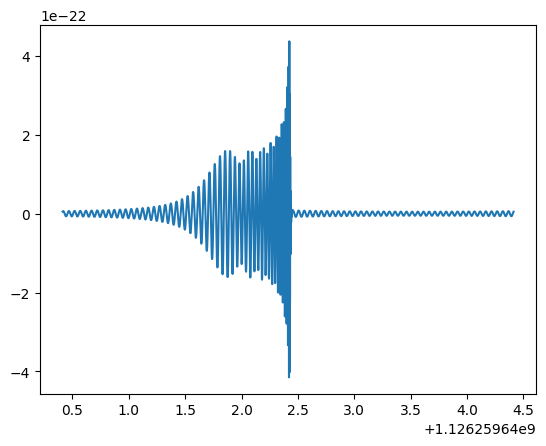

In [41]:
duration = 4
sampling_frequency = 2048
outdir = "visualising_the_results"
label = "example"

injection_parameters = dict(
    mass_1=36.0,
    mass_2=29.0,
    a_1=0.4,
    a_2=0.3,
    tilt_1=0.5,
    tilt_2=1.0,
    phi_12=1.7,
    phi_jl=0.3,
    luminosity_distance=1000.0,
    theta_jn=0.4,
    phase=1.3,
    ra=1.375,
    dec=-1.2108,
    geocent_time=1126259642.413,
    psi=2.659,
)  # specify waveform arguments
waveform_arguments = dict(
    waveform_approximant="IMRPhenomXP",  # waveform approximant name
    reference_frequency=50.0,  # gravitational waveform reference frequency (Hz)
)

# set up the waveform generator
waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(
    sampling_frequency=sampling_frequency,
    duration=duration,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    parameters=injection_parameters,
    waveform_arguments=waveform_arguments,
)  
ifos = bilby.gw.detector.InterferometerList(["H1", "L1"])
ifos.set_strain_data_from_zero_noise(
    duration=duration,
    sampling_frequency=sampling_frequency,
    start_time=injection_parameters["geocent_time"] - 2,
)
_ = ifos.inject_signal(
    waveform_generator=waveform_generator, parameters=injection_parameters
)

plt.plot(ifos[0].time_array, ifos[0].time_domain_strain, label="H1")